# 2021 인공지능 기말프로젝트
학번 & 이름: 2018130469 정지윤


기말 프로젝트 기한: 6월 18일

실습 내용:
- Logistic Regression
- MLP
- Cross Validation

과제에서 시도하여야 하는 분류 모델:
- i.	Decision Tree
- ii.	Logistic Regression
- iii.	Multilayer Perceptron(MLP)


# 실험 내용에 대한 전체 요약

이 보고서에서는 타이타닉 탑승자 데이터를 선정하여 분석하는 실험을 진행하였다. 전체 데이터를 table과 graph로 출력하여 EDA를 작성한 후, decision tree, logistic regression, MLP 3가지 모델을 사용하고 각각의 parameter을 변경시키며 accuracy와 auroc을 측정하고 그 중 가장 좋은 결과를 낸 parameter을 모델의 대표 parameter로 선정하여 최종적으로 3개의 모델을 비교하였다. 그 결과 이 3개 중 가장 높은 accuracy와 auroc을 보인 모델로 다시 test set을 통해 평가하여 최종 결과를 도출하였다.
  

# 실험 설계 및 방법
1. import statements
2. import data
2-1. plot label
3. view target count
4. preprocess
5. Split data
6. apply model
* 6의 각 분류 모델에 대하여

> i.	모델 생성 및 훈련

> ii.	모델 성능 평가 (cross validation)

> iii.	i, ii단계를 반복하며 최적의 모델
 파라미터 선정

6-1. Decision Tree

6-2. Logistic Regression

6-3. Multilayer Perceptron(MLP)

7. 최종 모델 선정 및 결론

> 최종 모델 선정
* test셋에 대하여 최종 모델의 성능 평가
* 모든 분류 모델의 test 성능 평가 비교 및 분석






## Titanic Dataset
https://www.kaggle.com/c/titanic/overview/description
https://raw.githubusercontent.com/inikoreaackr/datasets/main/titanic.csv


#1. import statements
데이터 분석을 위해 필요한 모듈을 import하였다.
import한 모듈은 다음과 같다.
- numpy: 수학적 연산을 위해
- pandas, seaborn: 기계학습을 위해
- matplotlib.pyplot: 그래프 등을 그리기 위해 사용.
* (np.set_printoptions: 나중에 설명 붙이기)

In [ ]:
# 1. import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

#2. Import data:
전처리된 데이터를 url을 통해 불러오고,
Explanatory data analysis를 위해 전체 데이터에 대한 개략적인 정보를 출력하였다.

출력된 정보는 다음과 같다.
- count(총 instance의 개수)
- mean(feature별로 data 값의 평균)
- std(표준편차)
- min, 25%, 50%, 75%, max (feature별로 최소값과 최대값, 그 사이의 사분위값)

그리고

- 위의 count, mean 등의 요소들의 값을 나타내는 자료형(dtype)

In [ ]:
# 2. import data
url = 'https://raw.githubusercontent.com/inikoreaackr/datasets/main/titanic.csv'
df = pd.read_csv(url)

df.head()
print(df.dtypes)
df.describe()


Survived      float64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      int64
Sex_male        int64
dtype: object


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.365546,0.634454
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.481921,0.481921
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000


#2-1. Plot Label
import data에서 가져온 데이터의 분포를 확인하기 위해 feature별로 막대그래프를 출력하였다.

x축은 각 feature 내의 데이터 값이며 y축은 전체 데이터에서 해당 값을 가진 총 instance의 수(count)이다.

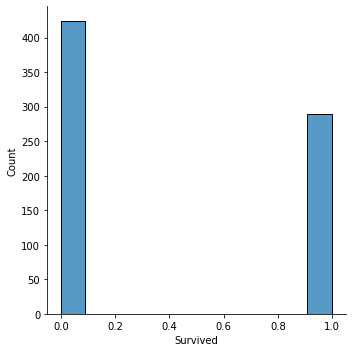

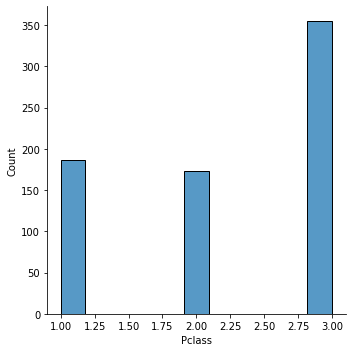

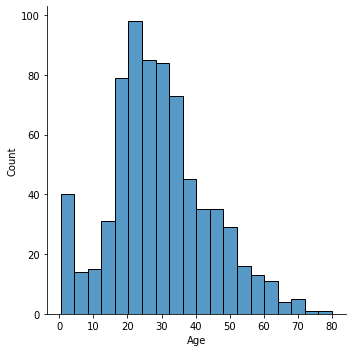

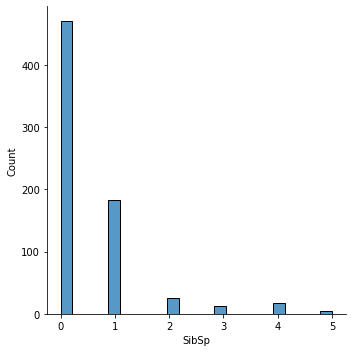

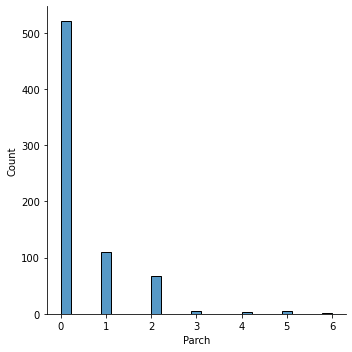

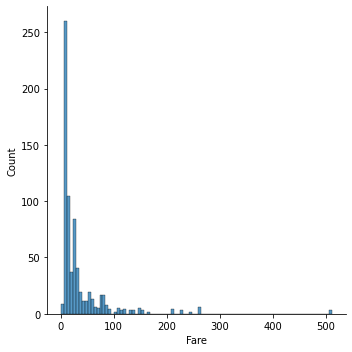

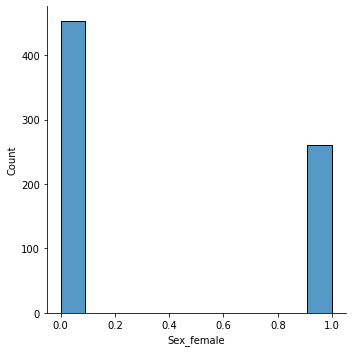

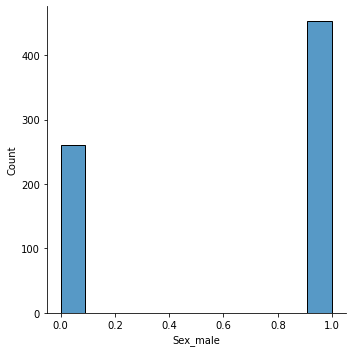

In [ ]:
#2-1. plot label
sns.displot(df, x='Survived')
sns.displot(df, x='Pclass')
sns.displot(df, x='Age')
sns.displot(df, x='SibSp')
sns.displot(df, x='Parch')
sns.displot(df, x='Fare')
sns.displot(df, x='Sex_female')
sns.displot(df, x='Sex_male')

#2-2. pair plot
#sns.pairplot(df)

#3. View target counts
본 data를 통해 '탑승자의 생존 여부'를 예측하기 전에, 해당 정보를 담고 있는  'Survived' feature을 통해 총 사망자와 총 생존자 수, 전체 인원 대비 생존자의 비율을 알아보았다.  
* 참고: np.bincount()는 ()안의 객체의 원소중 0부터 최대값 범위의 정수값을 올림차순으로 정리한 뒤, 각 원소에 대한 빈도수를 반환하는 numpy 함수이다.

* 여기서는 최소값이 0이고 최대값이 1이므로,
 0의 빈도가 424이고 1의 빈도가 290이라는 것은 사망자가 424명, 생존자가 290명임을 뜻한다. 전체 인원 대비 생존자는 약 40.6%이다.

In [ ]:
# 3. view target counts
dead, survived = np.bincount(df['Survived'])
print(dead, survived)
print(survived/(dead+survived))

424 290
0.4061624649859944


# Explanatory Data Analysis (#1,2,3을 바탕으로 분석)


본 데이터는 타이타닉호 탑승자들에 대한 정보를 담고 있다.
- 이 데이터를 통해 예측하고자 하는 것(분류 목적)은 어떤 탑승자에 대한 정보가 주어졌을 때 이 탑승자가 생존했는지의 여부이다. ('Survived' feature을 통해 알 수 있음: 0일 경우 사망,1일 경우 생존)
- 탑승자 한 명이 하나의 instance를 이루며, 총 714개의 instance로 이루어져 있다.

또한 instance를 설명하는 feature에는 총 8가지가 있다. 각 feature(column)의 종류와 전체적인 데이터 분포는 다음과 같다.
- Survived: 탑승자의 생존 여부를 알려준다. 1일 경우 생존, 0일 경우 사망했다는 뜻이다. 총 탑승자 714명 중 사망자가 424명이고 생존자가 290명으로, 분포는 생존자에 비해 사망자가 약 1.4배정도 많다.
- Age : 탑승자의 연령을 표시한다. 분포는 10대 후반 ~ 30대 초반이 가장 많은 가파른 종 모양이며, 영유아(5세미만)도 10대 ~ 30대를 제외한 타 연령층보다 많은 편이다.
- Pclass: 탑승자가 가진 티켓이 몇 등석 티켓이었는지 Ticket class를 표시한다. 1은 1등석, 2는 2등석, 3은 3등석을 뜻한다. 분포는 1등석과 2등석에 비해 3등석이 약 2배 많다.
- SibSp : 탑승자와 타이타닉에 같이 탑승한 탑승자의 형제자매, 배우자의 수를 뜻한다. 분포는 0명인 경우가 400명 이상으로 압도적으로 많고 1명인 경우가 200명 남짓 이었으며, 2명 이상부터는 급격하게 줄어드는 모양새를 보였다.
- Parch : 탑승자와 타이타닉에 같이 탑승한 탑승자의 부모, 자식 수를 뜻한다. SipSp와 비슷하게 0명인 경우가 500명 이상으로 압도적으로 많았으며 1명, 2명인 경우가 100명 위아래로 있었고, 3명 이상에 해당하는 경우는 매우 드물었다.
- Fare : 탑승자의 승선 요금을 표시한다. 단위가 달러라고 하였을 때, 분포는 0 ~ 50달러 사이 일부 구간이 250명 이상으로 압도적으로 많았으며 50 ~ 100달러, 100 ~ 200달러 후반까지 전체적으로 적어지면서 200달러 후반에서 사라지는 모습을 보이다가, 500달러 이상에서 다시 약간 나타나는 모습을 보인다.
- Sex_male, Sex_female : 탑승자의 성별을 알려주며, Sex_male과 Sex_female의 두 가지 column으로 나뉘어서 표시된다. 남성의 경우 Sex_male은 1, Sex_female은 0으로 표시되며, 여성은 반대로 Sex_male은 0, Sex_female은 1로 표시된다. 분포는 여성이 200명대 후반, 남성이 약 450명 정도인 것으로 보인다.

#4. Preprocess
- 3,4차 실습에서는 진행하였으나, 이번 과제에서는 시작할 때부터 전처리가 완료된 데이터를 사용하였으므로 생략하였다.

#5. Split data
전체 데이터를 train용, validation용, test용으로 나누는 작업을 진행하였다.

print한 내용은 각각 train, validation, test용 data를 나눈 후의 array의 크기이다. train set에는 571개, validation과 test set에는 각각 143개가 할당되었음을 알 수 있다.

- train_test_split(df, test_size, random_state): df라는 데이터세트에서 test_size에 해당하는 비율만큼을 test_df 또는 val_df에 할당하고, 이때 random_state의 값을 참조하여 세트를 섞어서(shuffle) split을 진행한다는 뜻이다.

In [ ]:
# 5. split data
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

y_train = np.array(train_df.pop('Survived'))
y_val = np.array(val_df.pop('Survived'))
y_test = np.array(test_df.pop('Survived'))

X_train = np.array(train_df)
X_val = np.array(val_df)
X_test = np.array(test_df)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(571, 7)
(143, 7)
(143, 7)
(571,)
(143,)
(143,)


# 6-1. Decision Tree


In [ ]:
# split train, validation and test data
from sklearn.model_selection import train_test_split
y = df[['Survived']]
X = df.drop(['Survived'], axis=1)
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_tr, X_val_tr, y_train_tr, y_val_tr = train_test_split(X_train_tr,y_train_tr,test_size=0.25, random_state=42)

Decision tree를 생성할 때 data type이 달라 기존에 만들었던 train set으로 진행할 수 없어, decision tree를 위한 train_test_split을 다시 진행하였다.

In [ ]:
# build and train decision tree
from sklearn.tree import DecisionTreeClassifier

decTree = DecisionTreeClassifier()
decTree.fit(X_train_tr, y_train_tr)

# get validation accuracy
decTree.score(X_val_tr, y_val_tr)

0.7902097902097902

Decision tree를 생성하고 train data를 적용시킨 후 validation accuracy를 도출하였다.

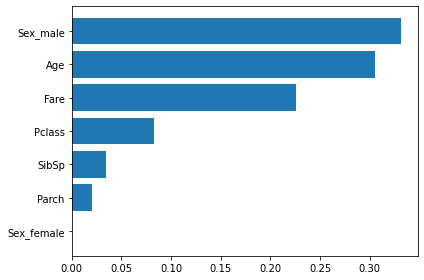

In [ ]:
# plot feature importance

#X_train_array = X_train.to_numpy()

def plot_imp(clf, data):
  sorted_idx = clf.feature_importances_.argsort()
  y_ticks = np.arange(0, len(data.columns))
  fig, ax = plt.subplots()
  ax.barh(y_ticks, clf.feature_importances_[sorted_idx])
  ax.set_yticklabels(data.columns[sorted_idx])
  ax.set_yticks(y_ticks)
  fig.tight_layout()
  plt.show()

plot_imp(decTree, X_train_tr)

feature importance를 시각화한 결과 성별, 연령, 요금(fare), 티켓 클래스, 배우자/형제자매 수, 부모/자식 수 순으로 생존 여부에 영향을 미친 것으로 드러났다.

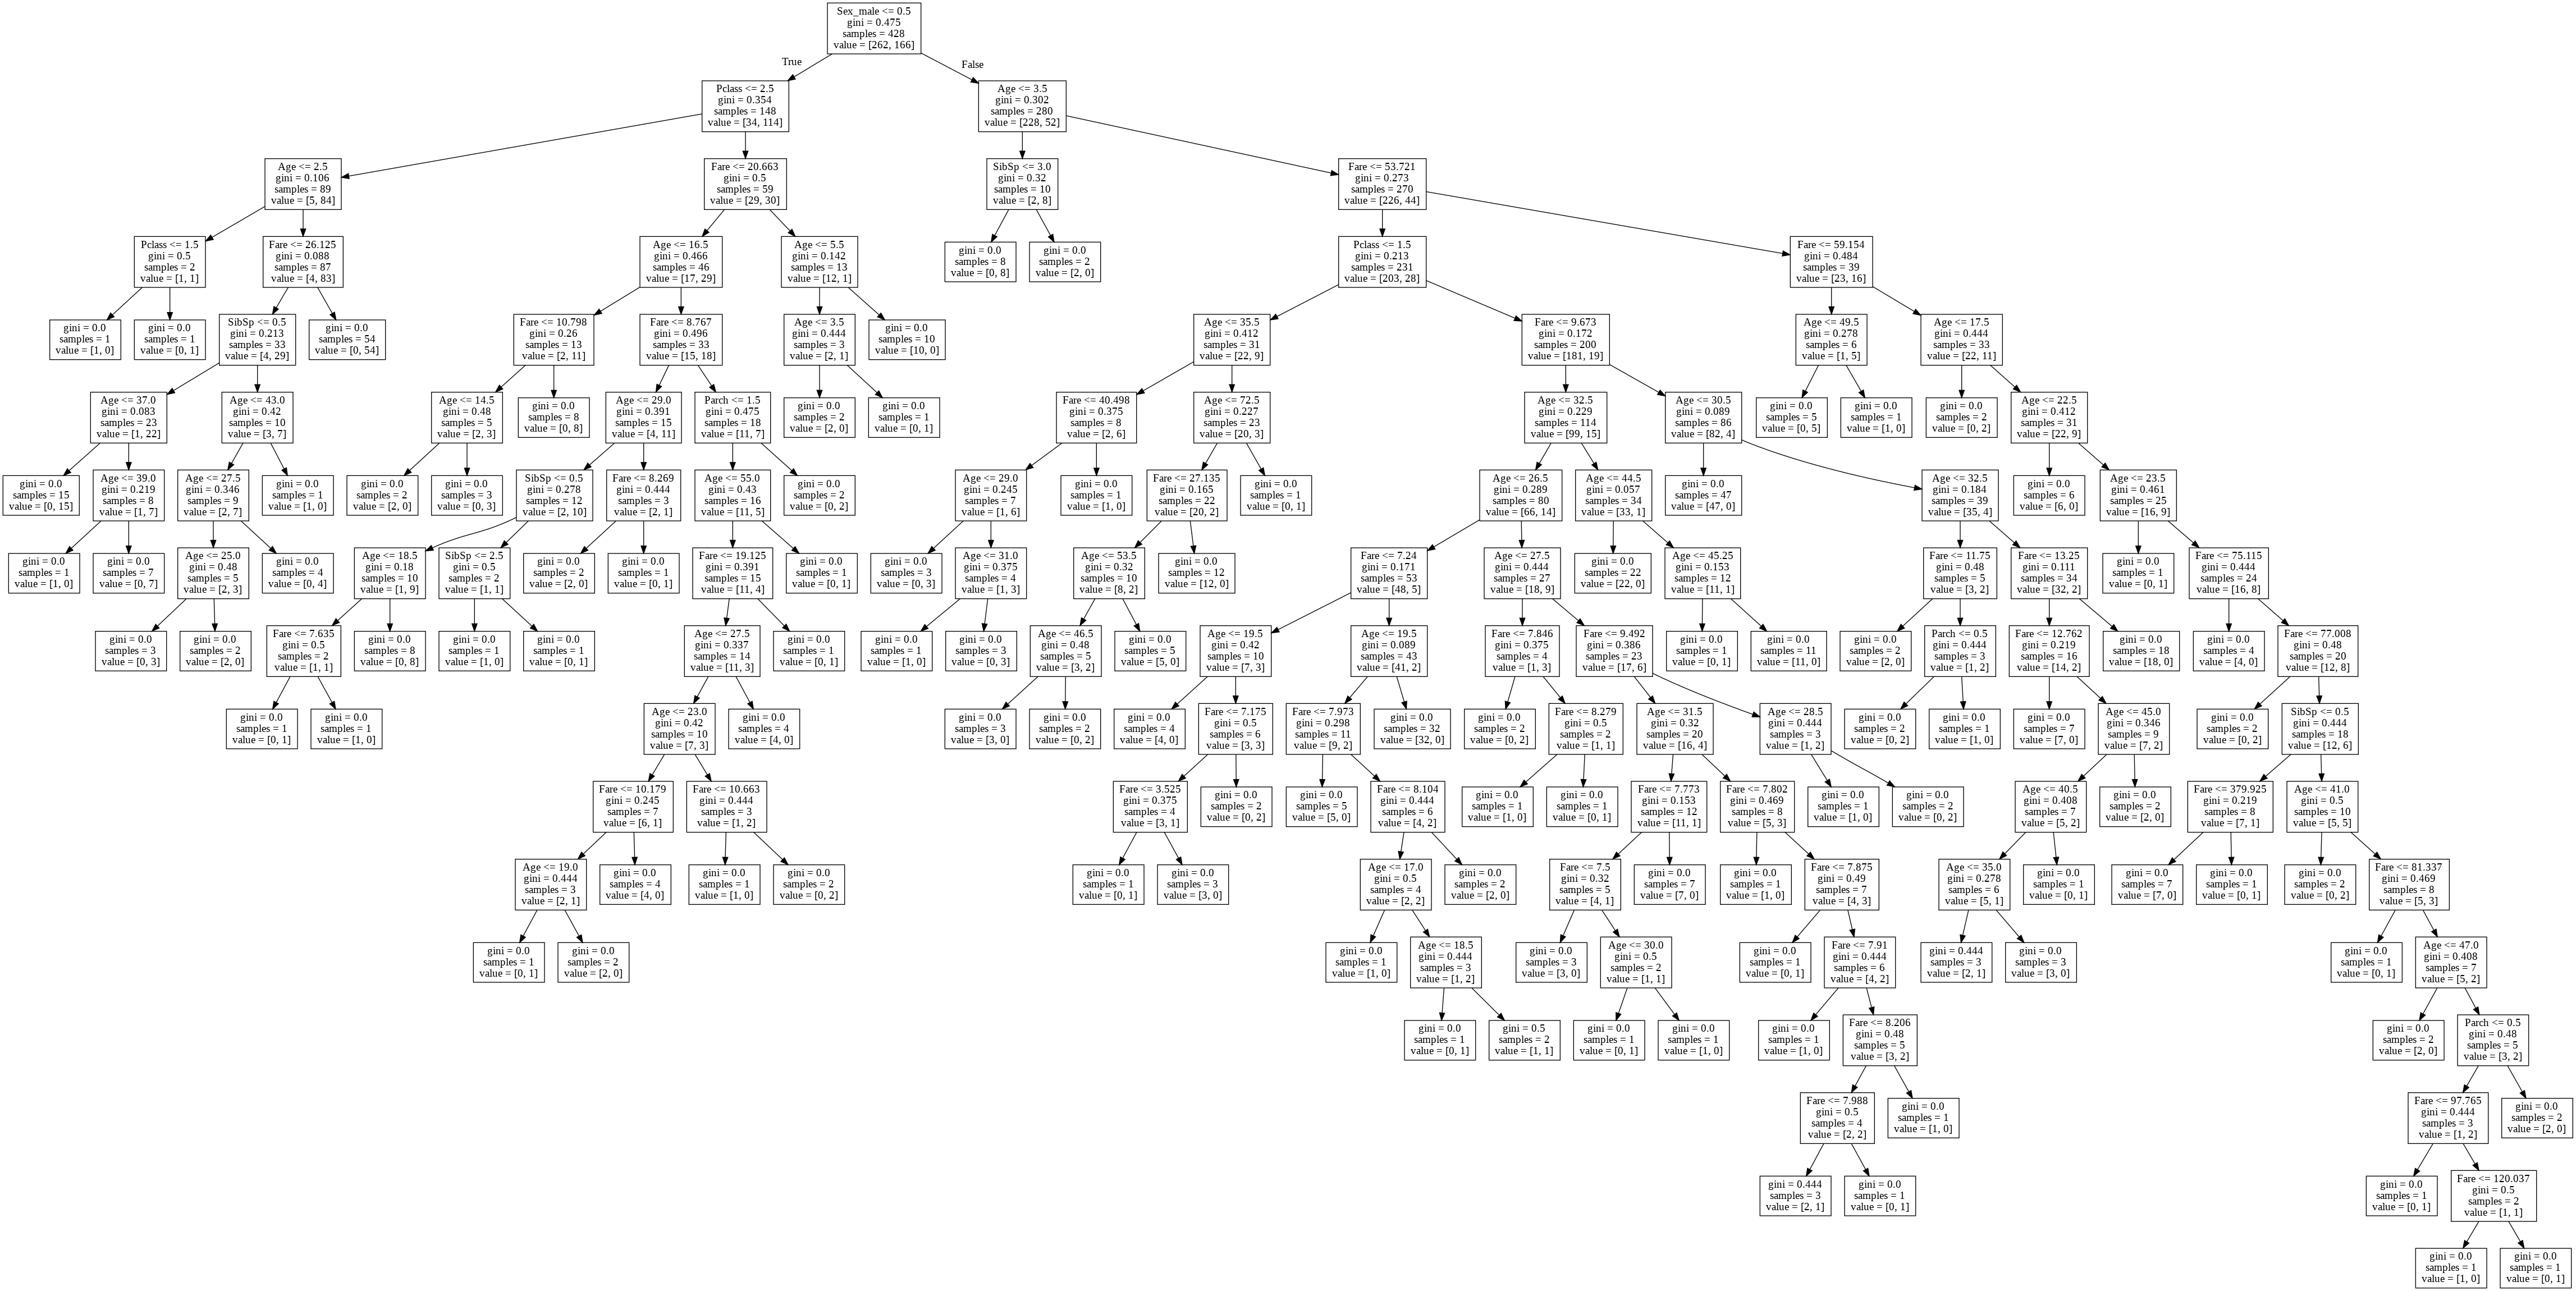

In [ ]:
# 트리 시각화
from sklearn.tree import export_graphviz # drawing graphs specified in DOT language scripts
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(decTree, feature_names=X_train_tr.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Pruned Tree
# 1. Change max_leaf_nodes
decTree_mln = DecisionTreeClassifier(max_leaf_nodes=5)
decTree_mln.fit(X_train_tr, y_train_tr)

# 2. Change max_depth
decTree_md = DecisionTreeClassifier(max_depth=3)
decTree_md.fit(X_train_tr, y_train_tr)

# 3. Change min_samples_split
decTree_mss = DecisionTreeClassifier(min_samples_split=200)
decTree_mss.fit(X_train_tr, y_train_tr)

# 4. Change min_samples_leaf
decTree_msl = DecisionTreeClassifier(min_samples_leaf=100)
decTree_msl.fit(X_train_tr, y_train_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Pruning
위에서 생성한 decision tree를 max leaf nodes, max depth, min sample split, min sample leaf 4가지를 변화시켜 pruning하고 auroc_score과 accuracy를 측정하였다.
* 그 결과, min sample split = 200이었을 때 accuracy와 auroc score 모두 가장 높아 이를 decision tree의 parameter로 선정하였다.

In [ ]:
from sklearn.metrics import classification_report

# 1. max_leaf_nodes
y_pred_tr = decTree_mln.predict(X_val_tr)
print(classification_report(y_val_tr, y_pred_tr))
# print auroc score
y_pred = decTree_mln.predict_proba(X_val_tr)[:,1]
print(roc_auc_score(y_val_tr, y_pred_tr))
# check accuracy
print(decTree_mln.score(X_val_tr, y_val_tr))
print('\n')

# 2. max_depth
y_pred_tr = decTree_md.predict(X_val_tr)
print(classification_report(y_val_tr, y_pred_tr))
# print auroc score
y_pred = decTree_md.predict_proba(X_val_tr)[:,1]
print(roc_auc_score(y_val_tr, y_pred_tr))
# check accuracy
print(decTree_md.score(X_val_tr, y_val_tr))
print('\n')

# 3. min_samples_split
y_pred_tr = decTree_mss.predict(X_val_tr)
print(classification_report(y_val_tr, y_pred_tr))
# print auroc score
y_pred = decTree_mss.predict_proba(X_val_tr)[:,1]
print(roc_auc_score(y_val_tr, y_pred_tr))
# check accuracy
print(decTree_mss.score(X_val_tr, y_val_tr))
print('\n')

#4. min_samples_leaf
y_pred_tr = decTree_msl.predict(X_val_tr)
print(classification_report(y_val_tr, y_pred_tr))
# print auroc score
y_pred = decTree_msl.predict_proba(X_val_tr)[:,1]
print(roc_auc_score(y_val_tr, y_pred_tr))
# check accuracy
print(decTree_msl.score(X_val_tr, y_val_tr))
print('\n')


              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80        75
         1.0       0.80      0.71      0.75        68

    accuracy                           0.78       143
   macro avg       0.78      0.77      0.77       143
weighted avg       0.78      0.78      0.77       143

0.7729411764705884
0.7762237762237763


              precision    recall  f1-score   support

         0.0       0.76      0.85      0.81        75
         1.0       0.81      0.71      0.76        68

    accuracy                           0.78       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.79      0.78      0.78       143

0.779607843137255
0.7832167832167832


              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80        75
         1.0       0.79      0.74      0.76        68

    accuracy                           0.78       143
   macro avg       0.78      0.78      0.78      

# 6-2. Logistic Regression

penalty, class_weight, solver을 for loop을 통해 변경시켜가며 다양한 classification metrics에서 가장 좋은 model parameter을 찾아보았다.
- penalty와 class weight 간에는 '특정 penalty는 특정 class weight과 사용하여야지만 작동한다'와 같은 제약이 많았다. 이를 전부 if문으로 구현하기에 어려움이 있어, for문을 사용한 후 try except문으로 예외를 처리하였다.
- roc_auc의 경우 다른 classification metrics와 달리 probability를 measure로 가지므로, y_pred 대신 y_pred_proba를 사용하였다.
- penalty = l2, class_weight = None, solver = liblinear인 경우에 가장 높은 precision_score, recall_score, f1_score, roc_auc_score이 산출되었고, 따라서 이들을 Logistic regression의 parameter로 결정하였다.

In [ ]:
# 6. logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

pen = ['l1', 'l2', 'elasticnet', 'none']
class_w = [None, 'balanced']
solv = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for p in pen:
  for c in class_w:
    for s in solv:
      try:
        lr = LogisticRegression(class_weight = c, max_iter=10000, penalty = p, random_state=42, solver = s)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_val)
        y_pred_proba = lr.predict_proba(X_val)[:, 1]
        print('penalty ', p, ' class_weight ', c, ' solver ', s)
        print(lr.score(X_val, y_val))
        print(precision_score(y_val, y_pred))
        print(recall_score(y_val, y_pred))
        print(f1_score(y_val, y_pred))
        print(roc_auc_score(y_val, y_pred_proba))
        print('\n')
      except:
        print('Penalty and Class_weight does not match')
        print('\n')


Penalty and Class_weight does not match


Penalty and Class_weight does not match


penalty  l1  class_weight  None  solver  liblinear
0.7482517482517482
0.6923076923076923
0.6428571428571429
0.6666666666666666
0.8153735632183907


Penalty and Class_weight does not match


penalty  l1  class_weight  None  solver  saga
0.7412587412587412
0.6727272727272727
0.6607142857142857
0.6666666666666666
0.8122947454844006


Penalty and Class_weight does not match


Penalty and Class_weight does not match


penalty  l1  class_weight  balanced  solver  liblinear
0.7412587412587412
0.6507936507936508
0.7321428571428571
0.6890756302521008
0.8135262725779967


Penalty and Class_weight does not match


penalty  l1  class_weight  balanced  solver  saga
0.7412587412587412
0.6666666666666666
0.6785714285714286
0.6725663716814159
0.8110632183908046


penalty  l2  class_weight  None  solver  newton-cg
0.7482517482517482
0.6923076923076923
0.6428571428571429
0.6666666666666666
0.8155788177339901


penalty  l

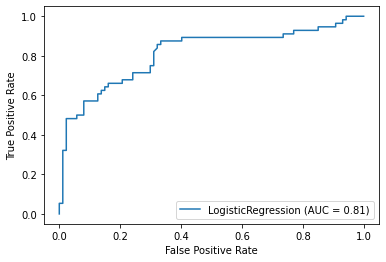

In [ ]:
# plot auroc curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr, X_val, y_val)

auroc curve을 plot한 결과, 위의 for loop의 roc_auc값에서 보았던 것처럼 AUC = 0.81이 나왔다.

# 6-3. Multilayer Perceptron (MLP)
## Cross validation (5-fold) 사용

hidden_layer_sizes, activation, solver을 for loop을 통해 변경시켜가며, cross_validation에서 가장 좋은 model parameter을 찾아보았다.
또한 cross validation을 위해 따로 validation set을 만들지 않고, training data를 5개 스플릿으로 나눠서 그 중에 하나를 validation set으로 사용하였다.

- activation 중 lbfgs의 경우 maxiteration = 10000까지 증가시켰는데도 'ConvergenceWarning: lbfgs failed to converge'라는 결과가 나와, 보고서 제출 시  activation loop에서 주석처리하여 제거하였다.
- precision, f1, recall의 경우 'UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.'오류로 인해 zero division을 발생시켜 0.0이라는 값이 나오게 만들어서, 보고서 제출 시에는 print문을 주석처리하여 제거하였다.

MLP의 다양한 파라미터를 사용한 결과를 요약하자면 다음과 같다.
- hidden_layer_sizes와 activation이 같을 경우 adam이 도출한 scoring 항목들의 값이 sgd보다 높았다.
- hidden_layer_sizes가 같을 경우, logistic과 adam의 조합이 가장 높은 scoring 항목들의 값을 도출하였다.
- hidder_layer_sizes는 대체로 layer당 perceptron의 수가 많을수록 또는 layer이 많아질수록 조금씩 (0.01정도) 증가하였다. 하지만 생각보다 scoring 항목들의 값에 결정적인 영향을 미치지는 않았다.

- 따라서 hidden_layer_sizes는 (50,2),
activation과 solver은 default인 'relu'와 'adam'으로 사용한 것이 가장 높은 scoring값을 도출하여 이를 MLP의 parameter로 선정하였다.

In [ ]:
# 19. MLP
# 20. 5-fold cross validation
# CV with multiple scoring metrics

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
h_size = [(10,), (50,), (100,), (10,2), (50,2), (100,2)]
activ = ['identity', 'logistic', 'tanh', 'relu']
solv = ['sgd', 'adam'] #'lbfgs' 제외

for h in h_size:
  for a in activ:
    for s in solv:
      try:
        mlp = MLPClassifier(hidden_layer_sizes=h, activation = a, solver = s, max_iter=10000, random_state=42)
        mlp.fit(X_train, y_train)
        cv_results = cross_validate(mlp, X_train, y_train, scoring=scoring, cv=5)
        print('hidden layer sizes', h, ' activation ', a, ' solver ', s)
        print(np.mean(cv_results['test_accuracy']))
        print(np.mean(cv_results['test_precision']))
        print(np.mean(cv_results['test_recall']))
        print(np.mean(cv_results['test_f1']))
        print(np.mean(cv_results['test_roc_auc']))
        print('\n')
      except:
        for sc in scoring:
          if sc == 0:
            'Division by 0 occured'


#mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
#mlp.fit(X_train, y_train)
#metrics.f1_score(y_test, y_pred, labels=np.unique(y_pred))

hidden layer sizes (10,)  activation  identity  solver  sgd
0.7337299771167048
0.6994490056559022
0.6403330249768733
0.6515430997858893
0.8054236963953156


hidden layer sizes (10,)  activation  identity  solver  adam
0.7811136536994661
0.7613383425085554
0.679463459759482
0.7171456395246357
0.8508444202235272


hidden layer sizes (10,)  activation  logistic  solver  sgd
0.7004576659038901
0.6676151755221522
0.5385753931544865
0.5949057236810399
0.7261191593320333


hidden layer sizes (10,)  activation  logistic  solver  adam
0.802135774218154
0.785668050998398
0.7137835337650325
0.7465703536982865
0.8689485112393088


hidden layer sizes (10,)  activation  tanh  solver  sgd
0.6917009916094584
0.6486022346854485
0.5513413506012951
0.5922456285428369
0.719657764938165


hidden layer sizes (10,)  activation  tanh  solver  adam
0.7898703279938978
0.7691419691419691
0.696577243293247
0.7305602324697767
0.8682454300841659


hidden layer sizes (10,)  activation  relu  solver  sgd
0.6689855072

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden layer sizes (50,)  activation  identity  solver  sgd
0.6165064836003051
0.4981728951478123
0.502127659574468
0.44682721396508124
0.7107755557522829


hidden layer sizes (50,)  activation  identity  solver  adam
0.784607170099161
0.7558729874776386
0.7007400555041627
0.7259157259059275
0.8578679627925562


hidden layer sizes (50,)  activation  logistic  solver  sgd
0.7057208237986269
0.6760805860805861
0.5428307123034227
0.6015882019285309
0.7372083980705927


hidden layer sizes (50,)  activation  logistic  solver  adam
0.8003508771929825
0.7854295095148752
0.7096207215541165
0.7445047380442029
0.8690793326180764


hidden layer sizes (50,)  activation  tanh  solver  sgd
0.7459954233409611
0.726029810298103
0.6153561517113784
0.6656017327737919
0.8252855816688447




In [ ]:
# 23. print CV result
cv_results.keys()
print(np.mean(cv_results['test_accuracy']))
print(np.mean(cv_results['test_precision']))
print(np.mean(cv_results['test_recall']))
print(np.mean(cv_results['test_roc_auc']))

### Finding model parameters with cross validation

# 6-1,2,3 정리
Decision tree, Logistic regression, MLP의
accuracy, auroc 비교
(세 개 모두에서 공통적으로 나온 지표 2가지를 우선 출력하고, 그 밑에 f1, precision, recall 등을 표기하였음)

In [ ]:
#Decision tree
y_pred_tr = decTree_msl.predict(X_val_tr)
print(classification_report(y_val_tr, y_pred_tr))
# check accuracy
print(decTree_msl.score(X_val_tr, y_val_tr))
# print auroc score
y_pred = decTree_msl.predict_proba(X_val_tr)[:,1]
print(roc_auc_score(y_val_tr, y_pred_tr))
print('\n')

#Logistic regression
lr = LogisticRegression(class_weight = None, max_iter=10000, penalty = 'l2', random_state=42, solver = 'liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
y_pred_proba = lr.predict_proba(X_val)[:, 1]
print(lr.score(X_val, y_val))
print(roc_auc_score(y_val, y_pred_proba))
print(precision_score(y_val, y_pred))
print(recall_score(y_val, y_pred))
print(f1_score(y_val, y_pred))
print('\n')

#MLP
mlp = MLPClassifier(hidden_layer_sizes=(50,20), activation = 'relu', solver = 'adam', max_iter=10000, random_state=42)
mlp.fit(X_train, y_train)
cv_results = cross_validate(mlp, X_train, y_train, scoring=scoring, cv=5)
print(np.mean(cv_results['test_accuracy']))
print(np.mean(cv_results['test_roc_auc']))
print(np.mean(cv_results['test_precision']))
print(np.mean(cv_results['test_recall']))
print(np.mean(cv_results['test_f1']))
print('\n')

#7. 최종 모델 선정
* Validation 성능 비교: 세 모델의 accuracy와 auroc을 비교한 결과, MLP가 가장 성능이 좋은 것으로 나타났다. (accuracy :0.7986270022883295, auroc:
0.856393110629039)

* 선정된 모델의 test 성능: (아래 코드 참조) accuracy: 0.6083916083916084, auroc:
0.5 로 validation보다 낮았다.

* 결론: MLP가 가장 좋은 validation 성능을 보였으며, test에서는 validation과 다른 성능이 나올 수 있다.

In [ ]:
mlp_final = MLPClassifier(hidden_layer_sizes=(50,2), max_iter=1000, random_state=42)
mlp_final.fit(X_train, y_train)
print(mlp_final.score(X_test, y_test)) # accuracy
y_pred = mlp_final.predict(X_test)
print(roc_auc_score(y_test, y_pred)) # auroc
print(f1_score(y_test, y_pred)) # f1
y_pred = mlp_final.predict_proba(X_test)[:,1]
